### Project Title: Credit Card Fraud Detection

### Course: CS 513 Knowledge Discovery and Data Mining

### Group Members:

### Ruchir Ajit Shrikhande 20005367

### Abhishek Panda 10478684

### Nikunj Gajera 20008706

### Surbhi Dhanani 20008876

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Dropout, Flatten
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split 
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

import xgboost as xg
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
from sklearn.metrics import  confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

Reading the Data

In [2]:
data = pd.read_csv("application_data.csv")

In [3]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(307511, 122)

In [5]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Dropping the columns that store the Normalized information about building where the client lives

In [6]:
MODE_cols = [col for col in data.columns if '_MODE' in col]
data.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in data.columns if '_MEDI' in col]
data.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in data.columns if '_AVG' in col]
data.drop(columns = AVG_cols,inplace=True)

Find all the columns starting with name FLAG_DOCUMENT , as these are just FLAGS indicating document submission and can be dropped

In [7]:
temp=data.filter(regex='^FLAG_DOCUMENT',axis=1)

Drop the FLAG_DOCUMENT Columns the column names are stored in temp Series

In [8]:
data.drop(columns=temp.columns,inplace=True)

These columns 'FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL' 
are FLAGS which need not be used in analysis so drop them

In [9]:
data.drop(columns=['FLAG_MOBIL',
                           'FLAG_EMP_PHONE',
                           'FLAG_WORK_PHONE',
                           'FLAG_CONT_MOBILE',
                           'FLAG_PHONE',
                            'FLAG_EMAIL'],inplace=True)

In [10]:
data.isnull().sum().sort_values(ascending=False)

OWN_CAR_AGE                    202929
EXT_SOURCE_1                   173378
OCCUPATION_TYPE                 96391
EXT_SOURCE_3                    60965
AMT_REQ_CREDIT_BUREAU_YEAR      41519
AMT_REQ_CREDIT_BUREAU_QRT       41519
AMT_REQ_CREDIT_BUREAU_MON       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_HOUR      41519
NAME_TYPE_SUITE                  1292
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
EXT_SOURCE_2                      660
AMT_GOODS_PRICE                   278
AMT_ANNUITY                        12
CNT_FAM_MEMBERS                     2
DAYS_LAST_PHONE_CHANGE              1
REG_REGION_NOT_LIVE_REGION          0
ORGANIZATION_TYPE                   0
LIVE_CITY_NOT_WORK_CITY             0
REG_CITY_NOT_WORK_CITY              0
REG_CITY_NOT_LIVE_CITY              0
LIVE_REGION_NOT_WORK_REGION         0
REG_REGION_N

Percentage of null values in each column


In [11]:
col_with_nullvalues=data.isnull().sum()/len(data)*100
col_with_nullvalues.sort_values(ascending=False)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_LIVE_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

List the columns having more than 50% missing values


In [12]:
nullvalues_50=col_with_nullvalues[col_with_nullvalues.values>50.0].sort_values(ascending=False)
nullvalues_50

OWN_CAR_AGE     65.990810
EXT_SOURCE_1    56.381073
dtype: float64

In [13]:
data.shape

(307511, 49)

Drop the columns with 60 % or more null values


In [14]:
col_with_nullvalues = list(col_with_nullvalues[col_with_nullvalues.values>=60.0].index)
data.drop(labels=col_with_nullvalues,axis=1,inplace=True)
print(len(col_with_nullvalues))

1


Checking the columns having less null percentage


In [15]:
data.isnull().sum()/len(data)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CL

Columns with int64 data types have 2 unique values and are flags, these columns cannot be used in bivariate analysis as they are not categorical.

In [16]:
data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
dtype: int64

Let us drop these columns as they have high null values and also their relevance in the analysis is insignificance, we can may be keep one such column 'AMT_REQ_CREDIT_BUREAU_QRT' which could be helpful.

In [17]:
data.drop(columns = ['AMT_REQ_CREDIT_BUREAU_YEAR',
                             'AMT_REQ_CREDIT_BUREAU_MON',
                             'AMT_REQ_CREDIT_BUREAU_WEEK',
                             'AMT_REQ_CREDIT_BUREAU_DAY',
                             'AMT_REQ_CREDIT_BUREAU_HOUR'],inplace=True)

In [18]:
data.drop(columns = ['REG_REGION_NOT_LIVE_REGION',
                             'REG_REGION_NOT_WORK_REGION',
                             'LIVE_REGION_NOT_WORK_REGION',
                             'REG_CITY_NOT_LIVE_CITY',
                             'REG_CITY_NOT_WORK_CITY',
                            'LIVE_CITY_NOT_WORK_CITY'],inplace=True)

In [19]:
data.shape

(307511, 37)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [21]:
#Sanity Check for columns and converting the negative values to positive values
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH'])
data['DAYS_ID_PUBLISH'] = abs(data['DAYS_ID_PUBLISH'])
data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED'])
data['DAYS_REGISTRATION'] = abs(data['DAYS_REGISTRATION'])

In [22]:
# Get the count,size and unique values in each column of application data
data.agg(['count','size','nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,134133,306851,246546,306490,306490,306490,306490,307510,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,58,114584,119831,814,33,10,33,9,3773,11


In [23]:
#Checking the distribution of target variable
defaulters=data[data.TARGET==1]
nondefaulters=data[data.TARGET==0]

In [24]:
#checking percentage of non-defaulters
percentage_nondefaulters=(len(nondefaulters)*100)/len(data)
percentage_nondefaulters

91.92711805431351

In [25]:
#checking percentage of defaulters
percentage_defaulters=(len(defaulters)*100)/len(data)
percentage_defaulters

8.072881945686495

Count plot of Defaulters vs Non Defaulters 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



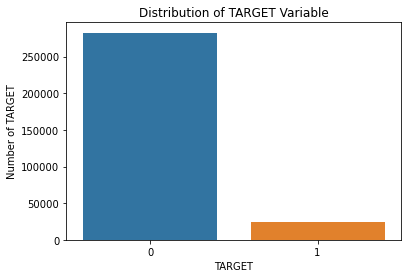

In [26]:
sns.countplot(data.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Number of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

Dataset is Imbalenced

In [27]:
#Looking at the data types of the columns considered for analysis
data.select_dtypes('object').columns
data.select_dtypes('float64').columns
data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START'],
      dtype='object')

In [28]:
#function for plotting categories based on defaulters and non-defaulters
def biplot(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,10))
    s1=sns.barplot(ax=ax1,x=defaulters[var].value_counts().index, data=defaulters, y= 100.* defaulters[var].value_counts(normalize=True))
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=12)
    ax1.set_title('Distribution of '+ '%s' %var +' - Defaulters', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("% of Loans",fontsize=15)
   
    s2=sns.barplot(ax=ax2,x=nondefaulters[var].value_counts().index, data=nondefaulters, y= 100.* nondefaulters[var].value_counts(normalize=True))
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=12)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("% of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Non-Defaulters', fontsize=15)
    plt.show()

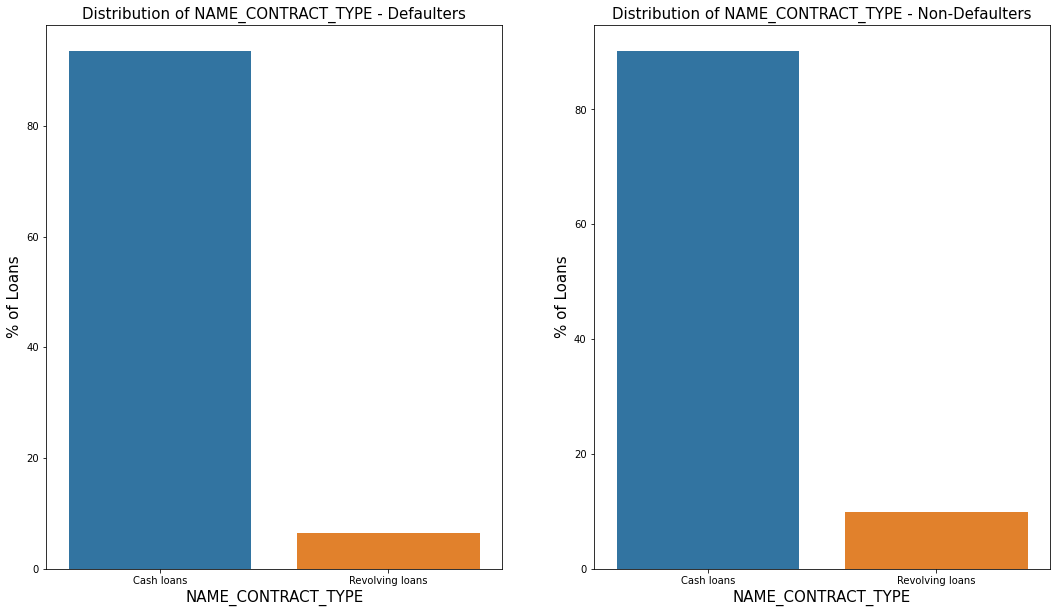

In [29]:
biplot(data, 'NAME_CONTRACT_TYPE', False)

For both Target = 0 and Target = 1, the percentage of Cash loans is significantly larger than the quantity of Revolving loans.

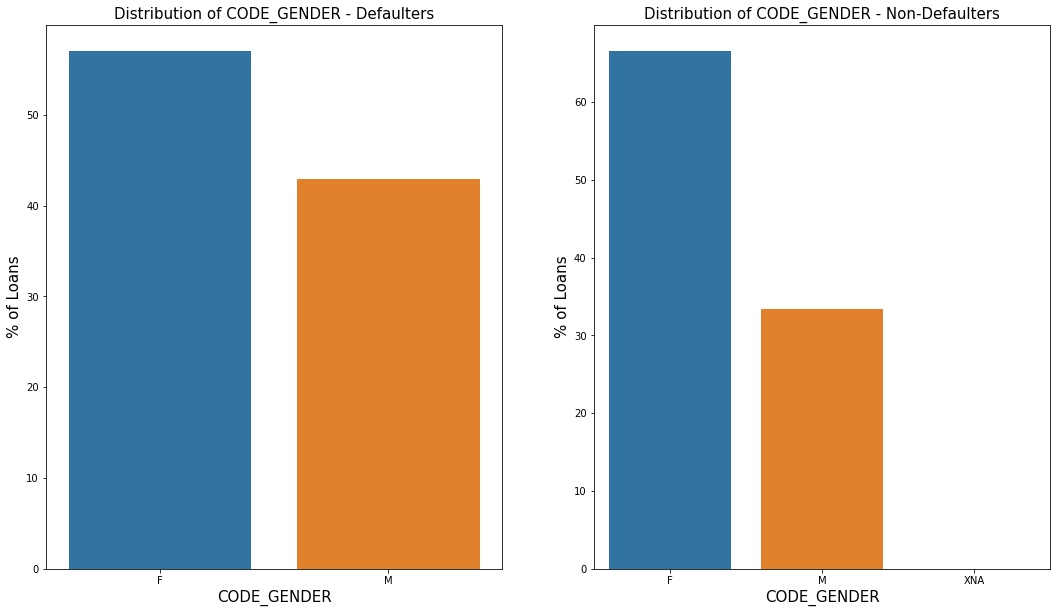

In [30]:
biplot(data, 'CODE_GENDER',False)

For both Target = 0 and Target = 1, more women than men take out loans as a proportion.

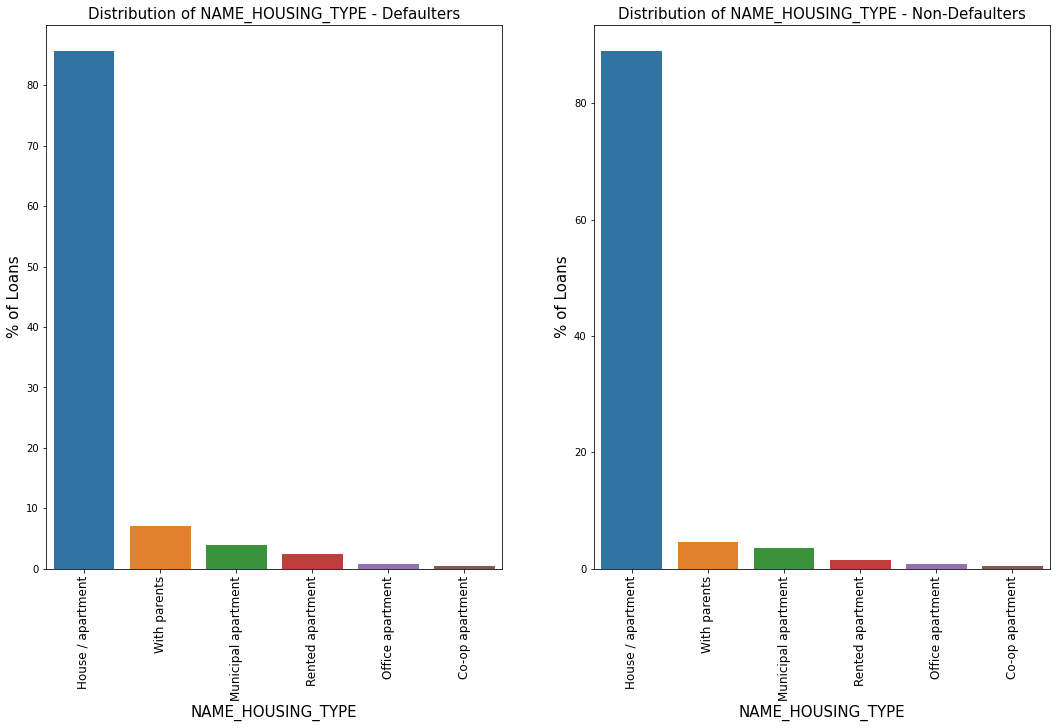

In [31]:
biplot(data, 'NAME_HOUSING_TYPE', True)

Almost everyone resides in a home or apartment. People who live with their parents are more likely to experience financial troubles.

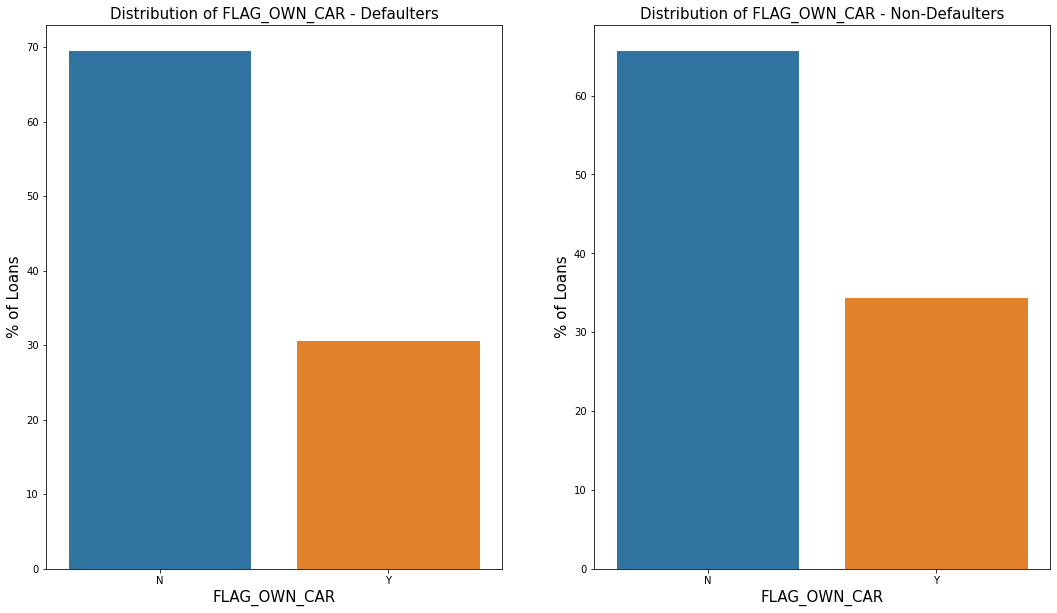

In [32]:
biplot(data, 'FLAG_OWN_CAR', False)

Most loan applicants don't have cars of their own. More people with cars are non-defaulters.

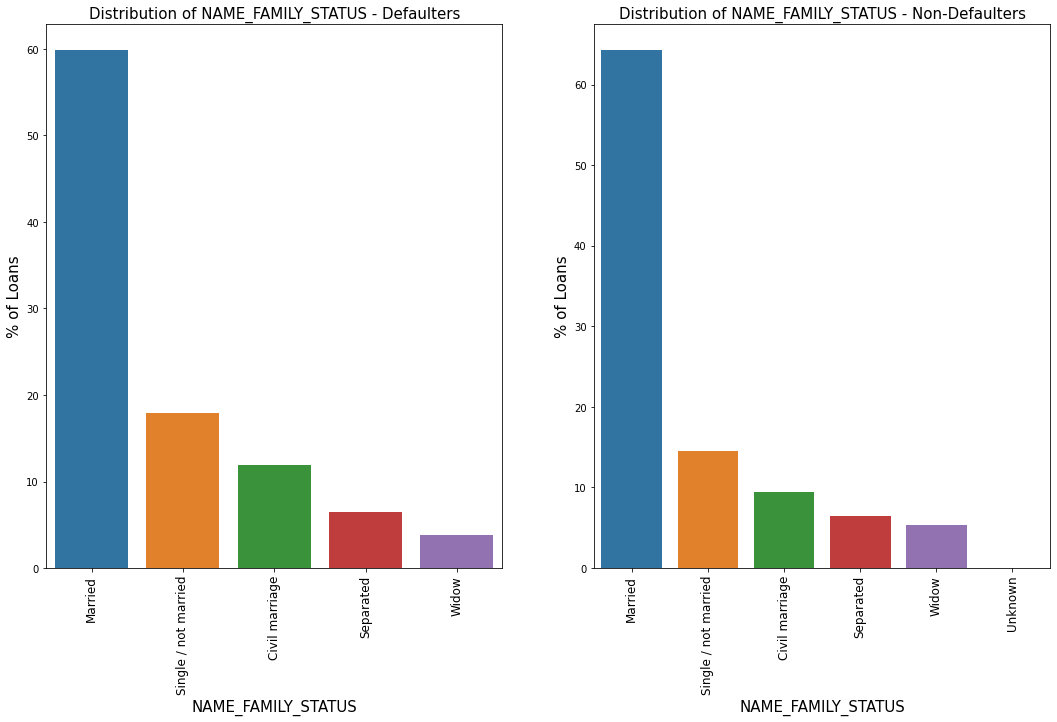

In [33]:
biplot(data, 'NAME_FAMILY_STATUS', True)

There are more single and divorced people among defaulters. People who are single or unmarried are more likely to have defaulted.

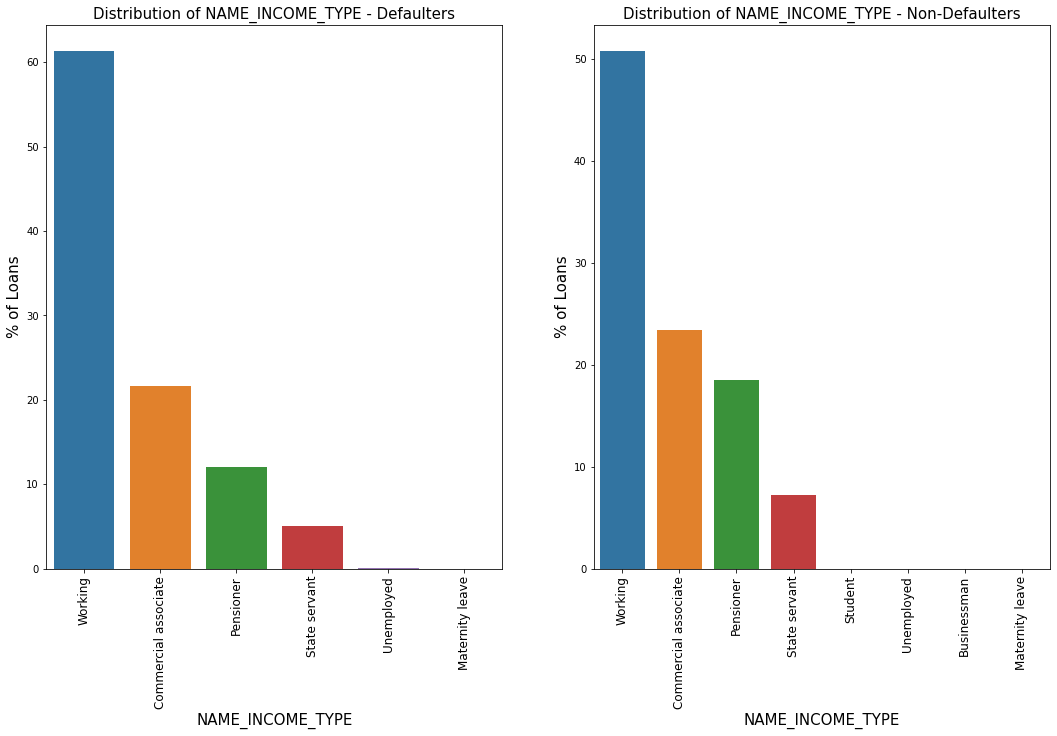

In [34]:
biplot(data, 'NAME_INCOME_TYPE', True)

Commercial associates, pensioners, and state employees have a larger fraction of non-defaulters to the entire population.

In [35]:
#function for plotting categories based on defaulters and non-defaulters for organization type
def biplot_orgtype(data, var,label_rotation):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(40,15))
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index)
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90,fontsize=18)
    ax1.set_title('Distribution of '+ '%s' %var +' - Defaulters', fontsize=15)
    ax1.set_xlabel('%s' %var,fontsize=15)
    ax1.set_ylabel("Count of Loans",fontsize=15)
   
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90,fontsize=18)
    ax2.set_xlabel('%s' %var, fontsize=15)
    ax2.set_ylabel("Count of Loans", fontsize=15)
    ax2.set_title('Distribution of '+ '%s' %var +' - Non-Defaulters', fontsize=15)
    plt.show()

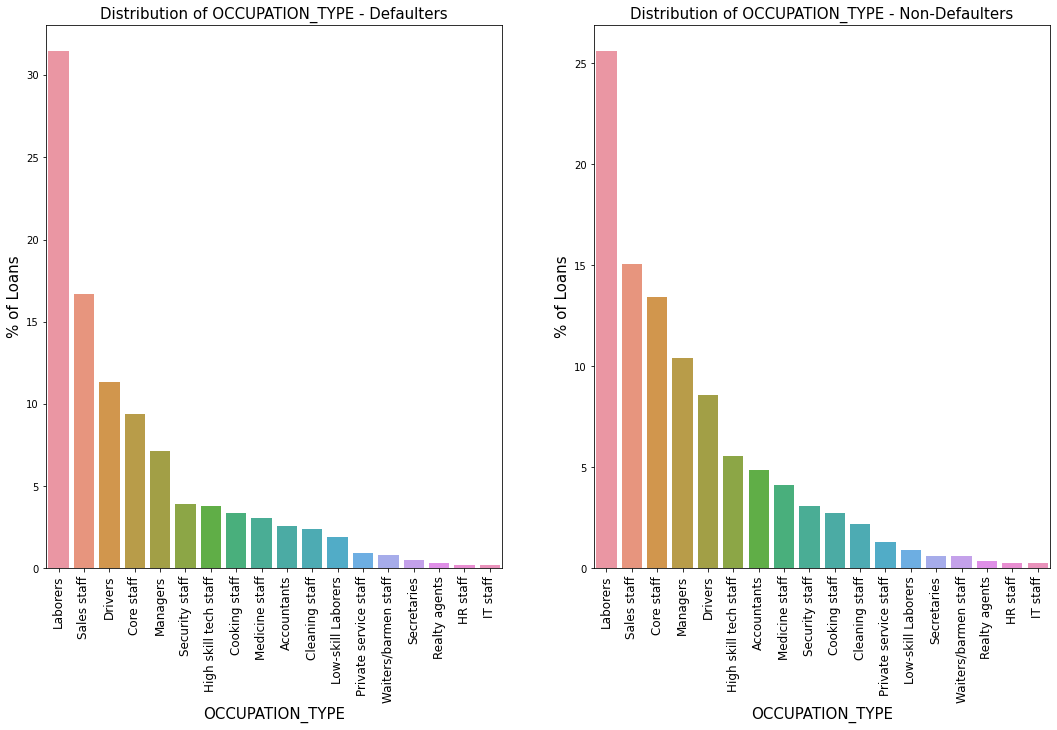

In [36]:
 biplot(data, 'OCCUPATION_TYPE', True)

Laborers and sales staff applicants appear to be the most prevalent in both the defaulter and non-defaulter categories.

In [37]:
#function for histogram
def plothist(var):
    plt.figure(figsize=(15,5))
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

In [38]:
# converting the days of birth to age
data['AGE'] = data['DAYS_BIRTH'] / 365

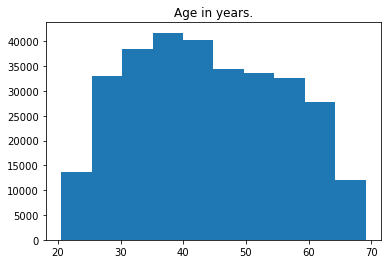

In [39]:
plt.hist(data['AGE']);

plt.title('Age in years.');

Age is Evenly distributed 

In [40]:
#Columns for Correlation_Maps
cols=['EXT_SOURCE_1',
      'CNT_CHILDREN',
      'AMT_INCOME_TOTAL',
      'AMT_CREDIT',
      'AMT_ANNUITY',
      'AMT_GOODS_PRICE',
      'HOUR_APPR_PROCESS_START',
      'DAYS_BIRTH',
      'DAYS_EMPLOYED',
      'CNT_FAM_MEMBERS',
      'AMT_REQ_CREDIT_BUREAU_QRT',
      'REGION_RATING_CLIENT_W_CITY', 
      'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH',]

In [41]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_QRT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH
EXT_SOURCE_1,1.000,-0.091,0.010,0.181,0.108,0.189,0.018,0.570,0.284,-0.051,-0.023,-0.068,-0.070,0.117
CNT_CHILDREN,-0.091,1.000,0.005,-0.002,0.031,-0.008,-0.024,-0.259,-0.193,0.885,-0.018,0.043,0.041,0.032
AMT_INCOME_TOTAL,0.010,0.005,1.000,0.038,0.046,0.038,0.014,-0.003,-0.015,0.007,-0.001,-0.023,-0.021,0.004
AMT_CREDIT,0.181,-0.002,0.038,1.000,0.752,0.983,0.032,0.135,0.002,0.051,-0.017,-0.071,-0.059,0.052
AMT_ANNUITY,0.108,0.031,0.046,0.752,1.000,0.753,0.031,0.014,-0.081,0.076,-0.010,-0.089,-0.074,0.017
AMT_GOODS_PRICE,0.189,-0.008,0.038,0.983,0.753,1.000,0.044,0.136,0.007,0.047,-0.016,-0.077,-0.066,0.056
HOUR_APPR_PROCESS_START,0.018,-0.024,0.014,0.032,0.031,0.044,1.000,-0.062,-0.060,-0.028,-0.002,-0.276,-0.294,-0.022
DAYS_BIRTH,0.570,-0.259,-0.003,0.135,0.014,0.136,-0.062,1.000,0.582,-0.203,0.017,-0.034,-0.034,0.253
DAYS_EMPLOYED,0.284,-0.193,-0.015,0.002,-0.081,0.007,-0.060,0.582,1.000,-0.187,0.014,0.003,0.003,0.229
CNT_FAM_MEMBERS,-0.051,0.885,0.007,0.051,0.076,0.047,-0.028,-0.203,-0.187,1.000,-0.013,0.048,0.044,0.032


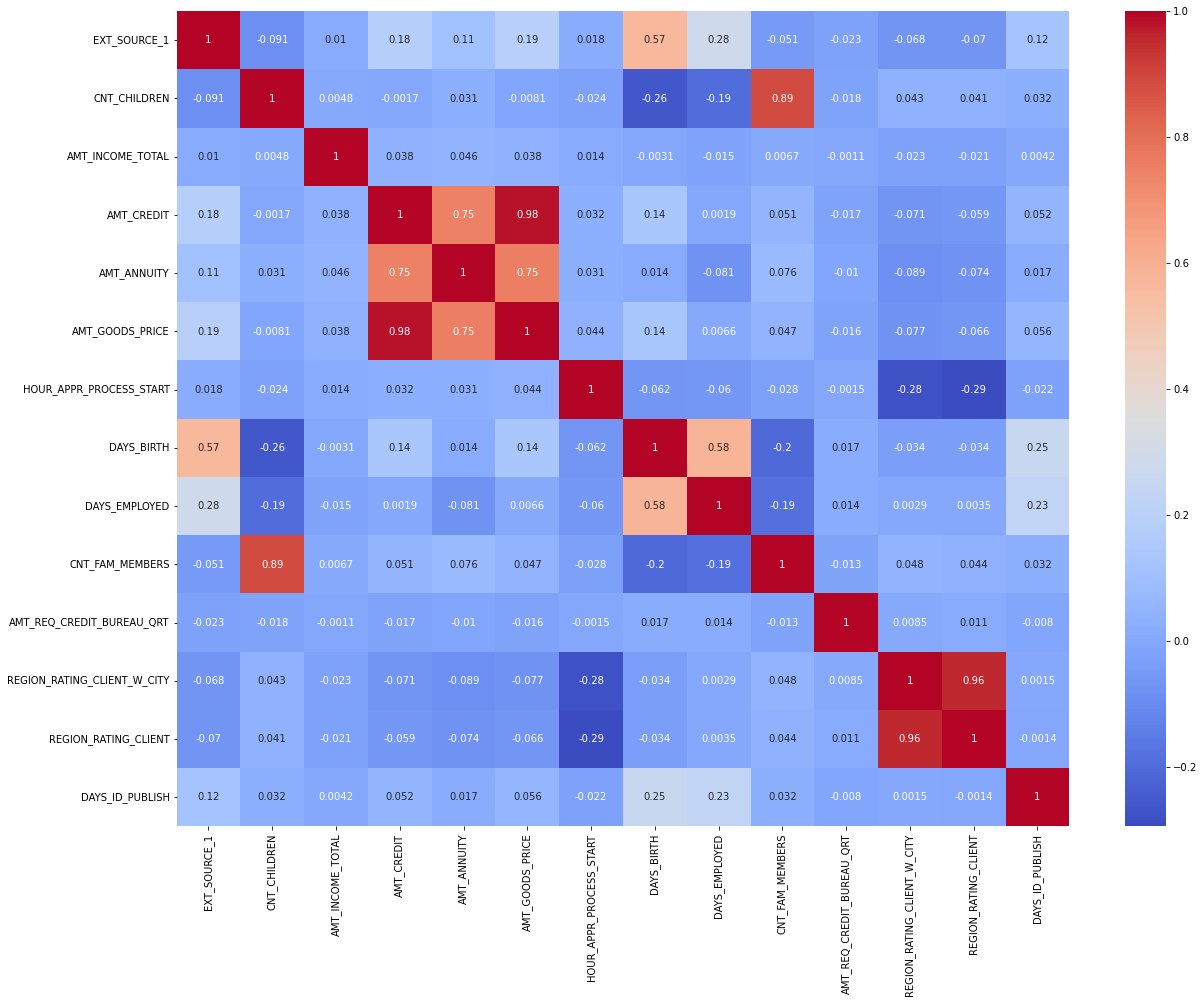

In [42]:
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(defaulters_correlation, cmap="coolwarm", annot=True)
plt.show()

Most positive correlations are-

AMT_CREDIT - AMT_GOODS_PRICE
REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
CNT_CHILDREN - CNT_FAM_MEMBERS
AMT_CREDIT - AMT_ANNUITY
AMT_GOODS_PRICE - AMT_ANNUITY


Most negative correlations are-

HOUR_APPR_PROCESS_START - REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
EXT_SOURCE_1 - DAYS_BIRTH
DAYS_BIRTH - EXT_SOURCE_1
DAYS_BIRTH - DAYS_EMPLOYED

In [43]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,EXT_SOURCE_1,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,AMT_REQ_CREDIT_BUREAU_QRT,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH
EXT_SOURCE_1,1.000,-0.143,0.075,0.165,0.120,0.171,0.029,0.601,0.299,-0.101,-0.003,-0.110,-0.111,0.128
CNT_CHILDREN,-0.143,1.000,0.027,0.003,0.021,-0.001,-0.005,-0.337,-0.245,0.879,-0.007,0.022,0.023,0.029
AMT_INCOME_TOTAL,0.075,0.027,1.000,0.343,0.419,0.349,0.077,-0.063,-0.140,0.034,0.013,-0.200,-0.187,-0.023
AMT_CREDIT,0.165,0.003,0.343,1.000,0.771,0.987,0.054,0.047,-0.070,0.065,0.018,-0.112,-0.103,0.001
AMT_ANNUITY,0.120,0.021,0.419,0.771,1.000,0.777,0.054,-0.012,-0.105,0.076,0.011,-0.145,-0.132,-0.014
AMT_GOODS_PRICE,0.171,-0.001,0.349,0.987,0.777,1.000,0.063,0.045,-0.069,0.063,0.018,-0.113,-0.104,0.004
HOUR_APPR_PROCESS_START,0.029,-0.005,0.077,0.054,0.054,0.063,1.000,-0.096,-0.095,-0.011,-0.001,-0.263,-0.284,-0.034
DAYS_BIRTH,0.601,-0.337,-0.063,0.047,-0.012,0.045,-0.096,1.000,0.626,-0.286,0.011,-0.001,-0.002,0.271
DAYS_EMPLOYED,0.299,-0.245,-0.140,-0.070,-0.105,-0.069,-0.095,0.626,1.000,-0.238,0.015,0.040,0.038,0.277
CNT_FAM_MEMBERS,-0.101,0.879,0.034,0.065,0.076,0.063,-0.011,-0.286,-0.238,1.000,-0.004,0.029,0.028,0.020


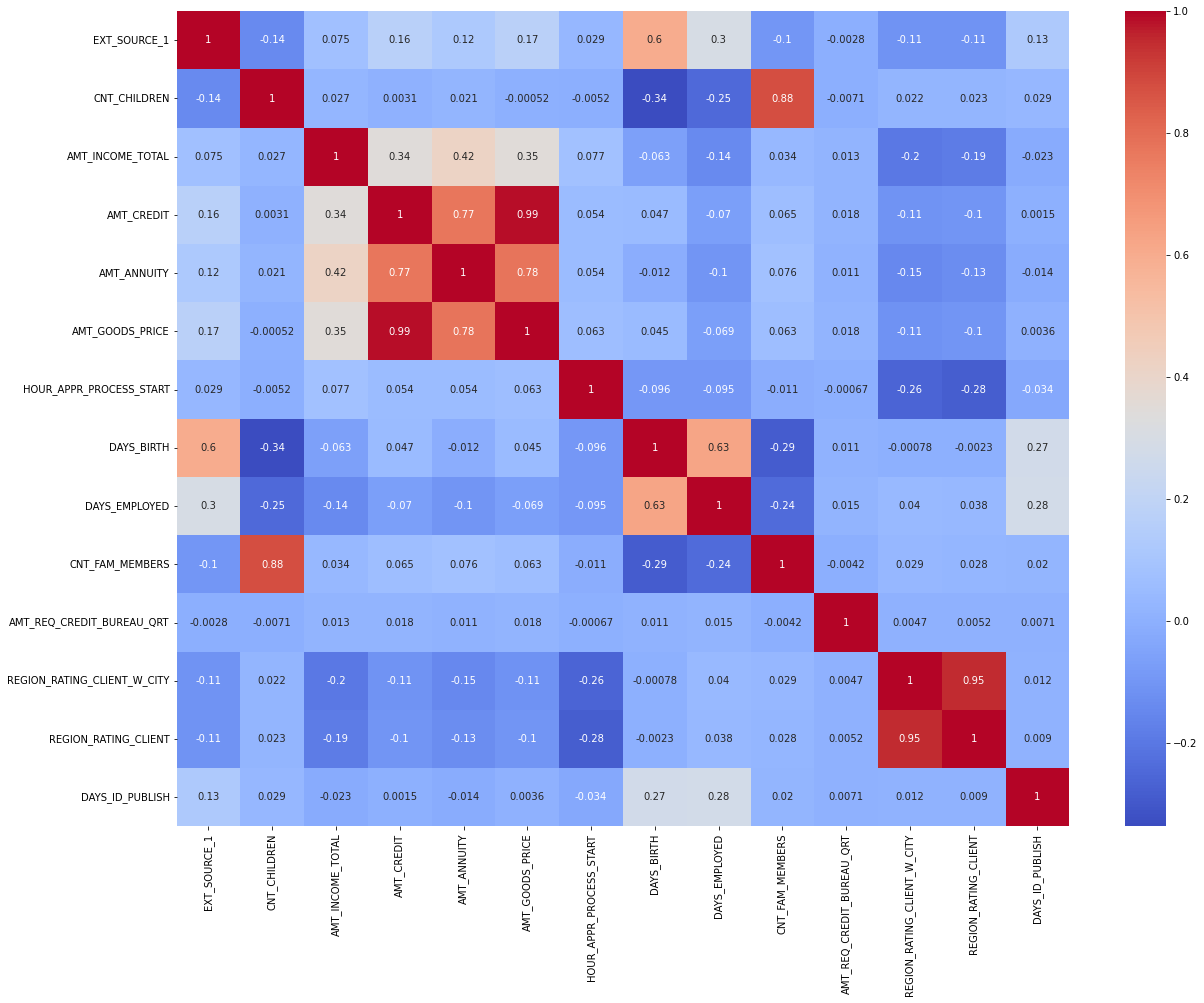

In [44]:
# figure size
plt.figure(figsize=(20,15))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="coolwarm", annot=True)
plt.show()

Most positive correlations are-

AMT_CREDIT - AMT_GOODS_PRICE
REGION_RATING_CLIENT_W_CITY - REGION_RATING_CLIENT
CNT_CHILDREN - CNT_FAM_MEMBERS
AMT_CREDIT - AMT_ANNUITY
AMT_GOODS_PRICE - AMT_ANNUITY

Most positive correlations are-

HOUR_APPR_PROCESS_START - REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
EXT_SOURCE_1 - DAYS_BIRTH
DAYS_BIRTH - EXT_SOURCE_1
DAYS_BIRTH - DAYS_EMPLOYED

In [45]:
data.drop(columns=['SK_ID_CURR'] , inplace =True)

In [46]:
# from sklearn.preprocessing import OneHotEncoder
# enc=OneHotEncoder()

# enc_data=pd.DataFrame(enc.fit_transform(data[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE']]).toarray())

In [47]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['NAME_CONTRACT_TYPE']= label_encoder.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER']= label_encoder.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR']= label_encoder.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY']= label_encoder.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE']= label_encoder.fit_transform(data['NAME_TYPE_SUITE'])
data['NAME_INCOME_TYPE']= label_encoder.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE']= label_encoder.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS']= label_encoder.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE']= label_encoder.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE']= label_encoder.fit_transform(data['OCCUPATION_TYPE'])
data['WEEKDAY_APPR_PROCESS_START']= label_encoder.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE']= label_encoder.fit_transform(data['ORGANIZATION_TYPE'])

In [48]:
data = data.dropna(axis=0)

In [49]:
X = data.drop("TARGET",axis=1)
Y = data.TARGET

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((87298, 36), (21825, 36))

1. Random Forest

In [51]:
# Applying random forest Classifier

Classifier1 = RandomForestClassifier(n_estimators = 10, random_state = 0)
Classifier1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [52]:
y_pred1 = Classifier1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
cm1=confusion_matrix(y_test,y_pred1)
print(cm1)
accuracy_score(y_test,y_pred1)

[[20152    44]
 [ 1593    36]]


0.9249942726231386

In [54]:
# Classification Report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.45      0.02      0.04      1629

    accuracy                           0.92     21825
   macro avg       0.69      0.51      0.50     21825
weighted avg       0.89      0.92      0.89     21825



2. Logistic Regression

In [55]:
# Applying Logistic Regression Classifier

classifier2 = LogisticRegression(random_state=0, max_iter=2000)
classifier2.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=0)

In [56]:
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[20196     0]
 [ 1629     0]]


0.925360824742268

In [57]:
# Classification Report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.00      0.00      0.00      1629

    accuracy                           0.93     21825
   macro avg       0.46      0.50      0.48     21825
weighted avg       0.86      0.93      0.89     21825



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



3. Decision Tree 

In [58]:
# Applying Decision Tree Classifier

classifier3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:

y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

[[18704  1492]
 [ 1369   260]]


0.8689117983963345

In [60]:
# Classification Report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     20196
           1       0.15      0.16      0.15      1629

    accuracy                           0.87     21825
   macro avg       0.54      0.54      0.54     21825
weighted avg       0.87      0.87      0.87     21825



4. KNN

In [61]:
# Applying K nearest neighbour Classifier

classifier4 = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
accuracy_score(y_test, y_pred4)

[[20192     4]
 [ 1628     1]]


0.9252233676975945

In [63]:
# Classification Report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.20      0.00      0.00      1629

    accuracy                           0.93     21825
   macro avg       0.56      0.50      0.48     21825
weighted avg       0.87      0.93      0.89     21825



SVM

In [64]:
# classifier5 = SVC(kernel = 'linear', random_state = 0)
# classifier5.fit(X_train, y_train)

In [65]:
# y_pred5 = classifier5.predict(X_test)
# cm5 = confusion_matrix(y_test, y_pred5)
# print(cm5)
# accuracy_score(y_test, y_pred5)

In [66]:
# # Classification Report
# print(classification_report(y_test, y_pred5))

5. Xgboost Random Forest Ensemble

In [67]:
# Applying Xgboost Random Forest Ensemble Classifier

classifier5 = xg.XGBRFClassifier(use_label_encoder=False, eval_metric = 'error')
classifier5.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', max_bin=256, max_cat_threshold=64,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0, ...)

In [68]:
y_pred5 = classifier5.predict(X_test)
cm5 = confusion_matrix(y_test, y_pred5)
print(cm5)
accuracy_score(y_test, y_pred5)

[[20190     6]
 [ 1619    10]]


0.9255441008018328

In [69]:
# Classification Report
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.62      0.01      0.01      1629

    accuracy                           0.93     21825
   macro avg       0.78      0.50      0.49     21825
weighted avg       0.90      0.93      0.89     21825



6. Naive Bayes

In [70]:
# Applying Naive Bayes Classifier

classifier6 = GaussianNB()
classifier6.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred6 = classifier4.predict(X_test)
cm6 = confusion_matrix(y_test, y_pred6)
print(cm6)
accuracy_score(y_test, y_pred6)

[[20192     4]
 [ 1628     1]]


0.9252233676975945

In [72]:
# Classification Report
print(classification_report(y_test, y_pred6))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.20      0.00      0.00      1629

    accuracy                           0.93     21825
   macro avg       0.56      0.50      0.48     21825
weighted avg       0.87      0.93      0.89     21825



7. ANN

In [73]:

model=Sequential()
model.add(Dense(1000,input_dim=36,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=5, verbose=1)

Epoch 1/5
2729/2729 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9271 - val_loss: 0.0000e+00 - val_accuracy: 0.9254
Epoch 2/5
2729/2729 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9272 - val_loss: 0.0000e+00 - val_accuracy: 0.9254
Epoch 3/5
2729/2729 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9272 - val_loss: 0.0000e+00 - val_accuracy: 0.9254
Epoch 4/5
2729/2729 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9272 - val_loss: 0.0000e+00 - val_accuracy: 0.9254
Epoch 5/5
2729/2729 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 0.9272 - val_loss: 0.0000e+00 - val_accuracy: 0.9254


In [75]:
prediction=model.predict(X_test)
cm7 = confusion_matrix(y_test, prediction)
print(cm7)
accuracy_score(y_test, prediction)

683/683 [==============================] - 1s 1ms/step
[[20196     0]
 [ 1629     0]]


0.925360824742268

In [76]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.00      0.00      0.00      1629

    accuracy                           0.93     21825
   macro avg       0.46      0.50      0.48     21825
weighted avg       0.86      0.93      0.89     21825



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



8. Xgboost

In [77]:
# Applying Xgboost Classifier

classifier8 = xg.XGBClassifier(use_label_encoder=False, eval_metric = 'error')
classifier8.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
y_pred8 = classifier8.predict(X_test)
cm8 = confusion_matrix(y_test, y_pred8)
print(cm8)
accuracy_score(y_test, y_pred8)

[[20109    87]
 [ 1573    56]]


0.9239404352806415

In [79]:
# Classification Report
print(classification_report(y_test, y_pred8))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     20196
           1       0.39      0.03      0.06      1629

    accuracy                           0.92     21825
   macro avg       0.66      0.52      0.51     21825
weighted avg       0.89      0.92      0.89     21825

